# Data Preprocessing
---

## Train/Validation 데이터셋 나누기

In [8]:
import json
import os
import random


def split_dataset(input_json, output_dir, val_ratio, random_seed):
    random.seed(random_seed)

    with open(input_json, encoding='utf-8') as json_reader:
        dataset = json.load(json_reader)

    images = dataset['images']
    annotations = dataset['annotations']
    categories = dataset['categories']

    # file_name에 prefix 디렉토리까지 포함 (CocoDataset 클래스를 사용하는 경우)
    # for image in images:
    #     image['file_name'] = '{}/{}'.format(image['file_name'][0], image['file_name'])

    image_ids = [x.get('id') for x in images]
    image_ids.sort()
    random.shuffle(image_ids)

    num_val = int(len(image_ids) * val_ratio)
    num_train = len(image_ids) - num_val

    image_ids_val, image_ids_train = set(image_ids[:num_val]), set(image_ids[num_val:])

    train_images = [x for x in images if x.get('id') in image_ids_train]
    val_images = [x for x in images if x.get('id') in image_ids_val]
    train_annotations = [x for x in annotations if x.get('image_id') in image_ids_train]
    val_annotations = [x for x in annotations if x.get('image_id') in image_ids_val]

    train_data = {
        'images': train_images,
        'annotations': train_annotations,
        'categories': categories,
    }

    val_data = {
        'images': val_images,
        'annotations': val_annotations,
        'categories': categories,
    }

    #output_seed_dir = os.path.join(output_dir, f'seed{random_seed}')
    output_seed_dir = os.path.join(output_dir)
    os.makedirs(output_seed_dir, exist_ok=True)
    output_train_json = os.path.join(output_seed_dir, 'train_label.json')
    output_val_json = os.path.join(output_seed_dir, 'val_label.json')

    print(f'write {output_train_json}')
    with open(output_train_json, 'w') as train_writer:
        json.dump(train_data, train_writer)

    print(f'write {output_val_json}')
    with open(output_val_json, 'w') as val_writer:
        json.dump(val_data, val_writer)

In [7]:
json_data_path = "./Split_CustomData/train/label/"
split_dataset(input_json= json_data_path + 'Train.json',
              output_dir=json_data_path,
              val_ratio=0.2,
              random_seed=13)

write ./CustomData/train/label/train.json
write ./CustomData/train/label/val.json


In [4]:
# split train data check
train_data = json.load(open(json_data_path + 'train_label.json'))

print('training data')
print(f'images: {len(train_data["images"])}')
print(f'annotations: {len(train_data["annotations"])}')
print(f'categories: {len(train_data["categories"])}')

training data
images: 19720
annotations: 108027
categories: 14


In [5]:
# split validation data check
val_data = json.load(open(json_data_path + 'val_label.json'))

print('validation data')
print(f'images: {len(val_data["images"])}')
print(f'annotations: {len(val_data["annotations"])}')
print(f'categories: {len(val_data["categories"])}')

validation data
images: 4930
annotations: 26714
categories: 14


In [ ]:
t

## 데이터 확인 및 csv 파일 저장

In [8]:
import pandas as pd # pandas 모듈 로드
import json  # json 모듈 로드
from collections import defaultdict

'''
# JSON Format
images : file_name, license, coco_url, height, width, data_captured, flickr_url, id
annotations : bbox, segmentation, iscrowd, area, image_id, category_id, id
info : description, url, version, year, contributor, created
licenses : url, id, name
categories : supercategory, name, id
'''

json_file_path="custom_data\label\Train.json" # 파일로드 (파일명 : NY.GDP.MKTP.CD.json )

with open(json_file_path,'r') as j:
    json_data=json.loads(j.read())  # open : r - 읽기모드, w-쓰기모드, a-추가모드  

FileNotFoundError: [Errno 2] No such file or directory: 'custom_data\\label\\Train.json'

In [7]:
# images 태그 df, csv 저장
img_dict = defaultdict(list)

for data in json_data['images']:
    img_dict['id'].append(data['id'])
    img_dict['file_name'].append(data['file_name'])
    img_dict['height'].append(data['height'])
    img_dict['width'].append(data['width'])

df = pd.DataFrame(img_dict)
df.to_csv("custom_data/images.csv", index=False)

NameError: name 'defaultdict' is not defined

In [13]:
# images 태그 df, csv 저장
# images : file_name, license, coco_url, height, width, data_captured, flickr_url, id
img_dict = defaultdict(list)

for data in json_data['images']:
    img_dict['id'].append(data['id'])
    img_dict['file_name'].append(data['file_name'])
    img_dict['height'].append(data['height'])
    img_dict['width'].append(data['width'])

img_df = pd.DataFrame(img_dict)
img_df.to_csv("custom_data/images.csv", index=False)

In [21]:
print(len(img_df))
img_df.head(10)

24650


,id,file_name,height,width
0,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920
1,1,20201223_세종특별자치시_-_-_맑음_주간_실내_left_000089_0432...,1080,1920
2,2,20201223_세종특별자치시_-_-_맑음_주간_실내_front_000053_043...,1080,1920
3,3,20201128_경상북도_영천시_-_맑음_주간_실외_back_0002338.png,1080,1920
4,4,20210112_경상남도_창원시_-_맑음_주간_실외_left_0192898.png,1080,1920
5,5,20210103_부산광역시_-_-_맑음_주간_실내_left_0085584.png,1080,1920
6,6,20201223_세종특별자치시_-_-_맑음_주간_실내_right_000083_045...,1080,1920
7,7,20210111_경상북도_경산시_-_맑음_주간_실내_back_0151057.png,1080,1920
8,8,20210111_경상북도_경산시_-_맑음_주간_실내_right_0149983.png,1080,1920
9,9,20201223_세종특별자치시_-_-_맑음_주간_실내_front_000078_043...,1080,1920


In [17]:
# annotations 태그 df, csv 저장
# annotations : bbox, segmentation, iscrowd, area, image_id, category_id, id

ann_dict = defaultdict(list)

for data in json_data['annotations']:
    ann_dict['id'].append(data['id'])
    ann_dict['bbox'].append(data['bbox'])
    ann_dict['area'].append(data['area'])
    ann_dict['image_id'].append(data['image_id'])
    ann_dict['category_id'].append(data['category_id'])

ann_df = pd.DataFrame(ann_dict)
ann_df.to_csv("custom_data/annotations.csv", index=False)

In [20]:
print(len(ann_df))
ann_df.head(10)

134741


,id,bbox,area,image_id,category_id
0,0,"[1017, 57, 409, 186]",76074,0,1
1,1,"[658, 100, 390, 300]",117000,0,1
2,2,"[166, 583, 67, 151]",10117,0,1
3,3,"[1445, 104, 157, 129]",20253,0,1
4,4,"[1230, 49, 315, 178]",56070,0,2
5,5,"[111, 723, 85, 191]",16235,0,2
6,6,"[267, 255, 332, 374]",124168,0,2
7,7,"[208, 453, 92, 198]",18216,0,2
8,8,"[1651, 180, 30, 110]",3300,0,8
9,9,"[672, 1, 738, 677]",499626,1,2


In [83]:
# ann_df 기준으로 합치되 imd_df의 id와 ann_df의 image_id를 매칭하여 합친다
merge_df = pd.merge(img_df, ann_df, how='right', left_on='id', right_on='image_id')
# 위 작업 시 id_x, id_y로 생기므로 id_x -> id, id_y 삭제
merge_df.drop(columns=['id_y', 'image_id'], axis=1, inplace=True)
merge_df.rename(columns={'id_x':'id'}, inplace=True) 
## 합친 csv 저장
merge_df.to_csv("custom_data/merge.csv")
merge_df


,id,file_name,height,width,bbox,area,category_id
0,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920,"[1017, 57, 409, 186]",76074,1
1,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920,"[658, 100, 390, 300]",117000,1
2,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920,"[166, 583, 67, 151]",10117,1
3,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920,"[1445, 104, 157, 129]",20253,1
4,0,20210103_부산광역시_-_-_맑음_주간_실내_right_0087778.png,1080,1920,"[1230, 49, 315, 178]",56070,2
...,...,...,...,...,...,...,...
134736,24648,20201223_세종특별자치시_-_-_맑음_주간_실내_front_000058_042...,1080,1920,"[780, 368, 104, 46]",4784,2
134737,24649,20201223_세종특별자치시_-_-_맑음_주간_실내_rear_000000_0436...,1080,1920,"[256, 633, 276, 117]",32292,1
134738,24649,20201223_세종특별자치시_-_-_맑음_주간_실내_rear_000000_0436...,1080,1920,"[166, 539, 189, 130]",24570,1
134739,24649,20201223_세종특별자치시_-_-_맑음_주간_실내_rear_000000_0436...,1080,1920,"[770, 619, 451, 165]",74415,6


In [101]:
# categories 태그 df, csv 저장
# categories : id, supercategory, name
category_dict = defaultdict(list)

for data in json_data['categories']:
    category_dict['id'].append(data['id'])
    category_dict['supercategory'].append(data['supercategory'])
    category_dict['name'].append(data['name'])

category_df = pd.DataFrame(category_dict)
category_df.to_csv("custom_data/categories.csv", index=False)

In [111]:
print(len(category_df))
category_df.head(14)

14


,id,supercategory,name
0,1,일반차량,세단(승용차)
1,2,일반차량,SUV
2,3,일반차량,승합차
3,4,일반차량,버스
4,5,목적차량,학원차량(통학버스)
5,6,목적차량,트럭
6,7,목적차량,택시
7,8,사람,성인
8,9,사람,어린이
9,10,이륜차,오토바이


## 이미지에 annotation 사각형 그려서 확인

In [164]:
test_image_df = merge_df[merge_df['id']==13] # id 입력
test_image_df

,id,file_name,height,width,bbox,area,category_id
78,13,20201205_경상북도_구미시_-_맑음_주간_실내_left_0018051.png,1080,1920,"[157, 201, 46, 206]",9476,8
79,13,20201205_경상북도_구미시_-_맑음_주간_실내_left_0018051.png,1080,1920,"[243, 201, 18, 80]",1440,8
80,13,20201205_경상북도_구미시_-_맑음_주간_실내_left_0018051.png,1080,1920,"[281, 164, 27, 94]",2538,8
81,13,20201205_경상북도_구미시_-_맑음_주간_실내_left_0018051.png,1080,1920,"[325, 116, 221, 121]",26741,14
82,13,20201205_경상북도_구미시_-_맑음_주간_실내_left_0018051.png,1080,1920,"[1631, 518, 87, 142]",12354,1


In [165]:
# 관심영역 표시 (roi.py)

import cv2
import numpy as np

image_array = np.fromfile('custom_data/images/'+test_image_df['file_name'].iloc[0], np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

print("Image Size : ",image.size) # (475 x 600 x 3) ==> 855Kb
print("Image Shape : ",image.shape) # (height, width, channel)
print("Image Data Type : ", image.dtype) # unsigned integer 8 bit


Image Size :  6220800
Image Shape :  (1080, 1920, 3)
Image Data Type :  uint8


In [166]:
for _, row in test_image_df.iterrows():
    color = np.random.randint(0, high = 256, size = (3,)).tolist()

    x=row['bbox'][0]; y=row['bbox'][1]
    w=row['bbox'][2]; h=row['bbox'][3]
    roi = image[y:y+h, x:x+w] 

    cv2.rectangle(roi, (0,0), (h-1, w-1), color, 3) # roi 전체에 사각형 그리기 ---②
    cv2.imshow("img", image)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

-1


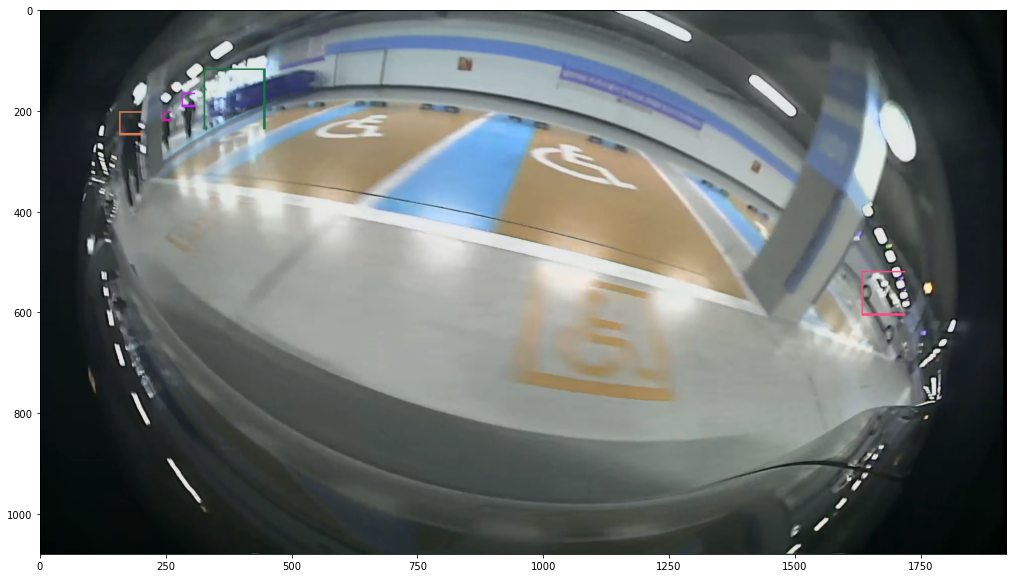

In [167]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(19, 10))
plt.imshow(image)
plt.show()